<center><h1> Projet Kickstarter</h1></center>

## _Prédiction du succès d'une compagne de financenement sur KickStarter_
- **Partie 1 : Analyse exploratoire des données**
- Partie 2 : Processing des données
- Partie 3 : Enrichissement du dataset : WebScraping
- Partie 4 : Analyse statistique et Data Visualisation
- Partie 5 : Machine Learning

<hr/>


## Partie 1 : Analyse exploratoire des données

> Le jeu de données a été téléchargé depuis le site [WebRobots](https://webrobots.io/kickstarter-datasets/) le _25/02/2021_, il est issu de la mise à jour du **11/02/2021**.
>
> Le fichier Zip ainsi téléchargé contient _58 fichiers .csv_.
>
> Pour cette analyse exploratoire, nous allons nous focaliser sur le premier fichier `Kickstarter.csv`, puis dans la _Partie 2_ du projet, nous allons les regrouper pour ne former qu'un seul dataset.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import Ressources.kickstarter
from Ressources import kickstarter



sns.set_theme()

ImportError: cannot import name 'kickstarter' from 'Ressources' (unknown location)

> - Importation du dataset 

In [3]:
df = pd.read_csv("kickstarter_files/Kickstarter.csv")
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,128,"Adorable enamel pins, stickers, prints, key ch...","{""id"":21,""name"":""Digital Art"",""slug"":""art/digi...",4983,US,the United States,1595800168,"{""id"":1770702125,""name"":""Torrey"",""slug"":""trave...",USD,$,...,adorable-alien-enamel-pins,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1600220481,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",4983.000000,domestic
1,1,With your help we will create this device that...,"{""id"":331,""name"":""3D Printing"",""slug"":""technol...",1,ES,Spain,1439946079,"{""id"":371030505,""name"":""Marco"",""is_registered""...",EUR,€,...,save-water-100-liquid-downloads-in-toilets,https://www.kickstarter.com/discover/categorie...,False,False,failed,1468109484,1.136930,"{""web"":{""project"":""https://www.kickstarter.com...",1.136930,domestic
2,2,We at Ormiston Primary are looking at starting...,"{""id"":309,""name"":""Farms"",""slug"":""food/farms"",""...",9,NZ,New Zealand,1439330661,"{""id"":270943701,""name"":""Kyle Hattie"",""is_regis...",NZD,$,...,ormiston-primary-community-garden,https://www.kickstarter.com/discover/categorie...,False,False,failed,1442001341,0.655304,"{""web"":{""project"":""https://www.kickstarter.com...",9.829555,domestic
3,0,Self-taught aspiring metalsmith Looking for he...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",0,US,the United States,1430270043,"{""id"":109357255,""name"":""Bryan Carrero"",""is_reg...",USD,$,...,aspiring-metalsmith-in-need-of-better-tools-an...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1432862044,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic
4,0,So many women believe they are past their prim...,"{""id"":278,""name"":""People"",""slug"":""photography/...",0,US,the United States,1404711052,"{""id"":353303238,""name"":""Sandra Metcalf"",""is_re...",USD,$,...,beauty-at-any-age,https://www.kickstarter.com/discover/categorie...,False,False,failed,1414296048,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic


> - Taille du dataset

In [4]:
df.shape

(3687, 38)

> Notre data set contient **38** variables.
<hr/>

- Type de variables du data set:

object     21
int64       8
bool        5
float64     4
dtype: int64

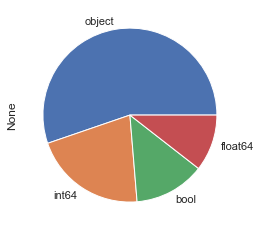

In [5]:
# Déterminer le type de variable du dataset
df.dtypes.value_counts().plot.pie();
df.dtypes.value_counts()

> Les variables du dataset se répartissent comme suit : 
> - 21 Variables de type `object`
> - 8 variables de type `int`
> - 5 variables de type `booleen`
> - 4 varianles de type `float`
<hr/>

- Affichage des colonnes du dataset

In [62]:
types=[]
for colonne in df.columns: 
    types.append(df[colonne].dtypes)

dg = pd.DataFrame()
dg['colonne'] = df.columns
dg['type'] = types
dg = dg.set_index('colonne', drop=True)
dg = dg.sort_values(by='type', ascending=False)
dg

,type
colonne,
usd_type,object
friends,object
permissions,object
name,object
location,object
profile,object
is_starred,object
blurb,object
is_backing,object


### Exploration des valeurs manquantes

In [63]:
dp = round(df.isna().sum()/df.shape[0],2)*100
dr = df.isna().sum()
dt = pd.DataFrame(data = dr, columns = ['Nombre de NaN'], index=dr.index)
dt['Propotion (%)'] = dp
dt

,Nombre de NaN,Propotion (%)
backers_count,0,0.0
blurb,0,0.0
category,0,0.0
converted_pledged_amount,0,0.0
country,0,0.0
country_displayable_name,0,0.0
created_at,0,0.0
creator,0,0.0
currency,0,0.0
currency_symbol,0,0.0


- Visualisation des valeurs manquantes

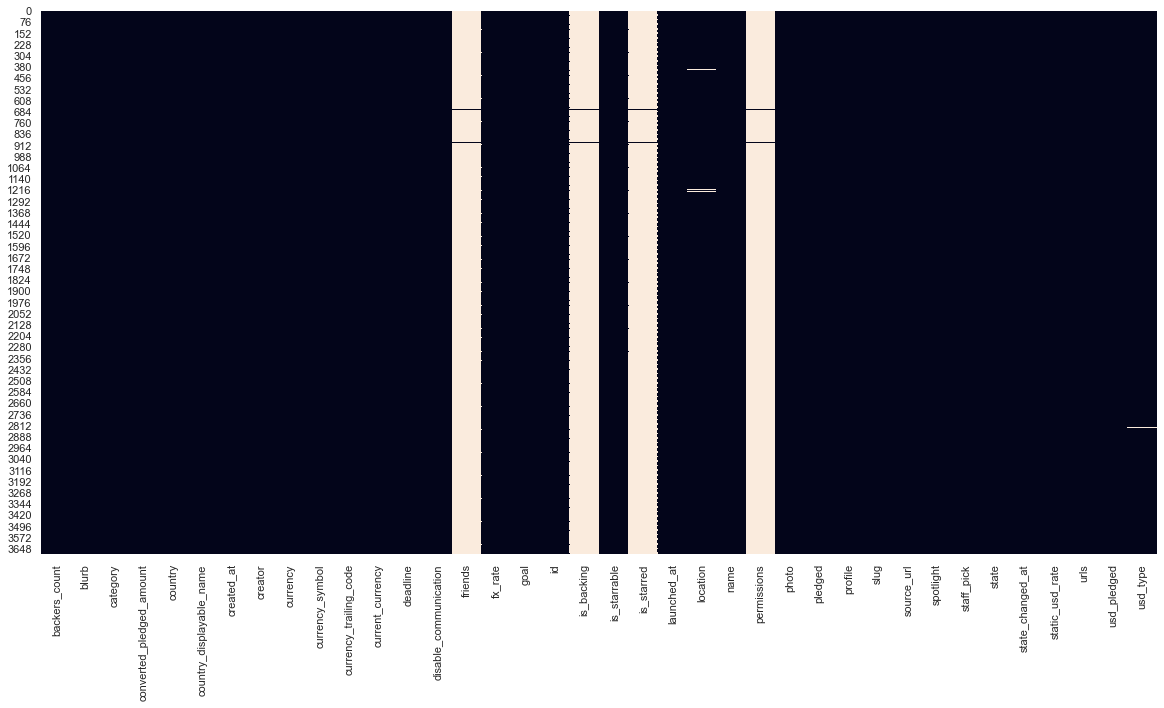

In [8]:
# Exploration des Valeurs manquantes
plt.figure(figsize=(20,10));
sns.heatmap(df.isna(), cbar=False); #cbar permet de retirer la barre de couleur à droite

> Les variables `friends`, `is_backing`, `is_starred` et `permissions` ne contiennent que des valeurs manquantes.
>
> Ces variables vont être supprimées dans la partie processing


### Analyse des variables catégorielles

- Analyse de la variable `category`

In [44]:
df['category'].value_counts()

{"id":22,"name":"Illustration","slug":"art/illustration","position":4,"parent_id":1,"parent_name":"Art","color":16760235,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/art/illustration"}}}                                              135
{"id":44,"name":"World Music","slug":"music/world music","position":18,"parent_id":14,"parent_name":"Music","color":10878931,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/music/world%20music"}}}                                       115
{"id":28,"name":"Product Design","slug":"design/product design","position":5,"parent_id":7,"parent_name":"Design","color":2577151,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/design/product%20design"}}}                              109
{"id":342,"name":"Web","slug":"technology/web","position":15,"parent_id":16,"parent_name":"Technology","color":6526716,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/technology/w

> La variable `category` est sous un format de dictionnaire avec plusieurs sous-variables, dont certaines semblent pertinentes, à savoir : 
> - `id` : Id de la catégorie
> - `name` : Nom de de la catégorie
> - `parent_id` : Id de la catégorie mère
> - `parent_name` : Nom de la catégorie mère

<hr/>

- Analyse de la variable `country_displayable_name`

In [41]:
df['country_displayable_name'].value_counts()

the United States     2448
the United Kingdom     410
Canada                 180
Australia               96
Germany                 78
Mexico                  62
France                  57
Spain                   53
Italy                   52
the Netherlands         43
Sweden                  36
Hong Kong               28
Singapore               22
New Zealand             21
Denmark                 20
Belgium                 17
Japan                   17
Switzerland             13
Ireland                 12
Austria                  9
Norway                   8
Greece                   2
Luxembourg               2
Slovenia                 1
Name: country_displayable_name, dtype: int64

> La variable `country_displayable_name` représente le nom du pays du projet, et nous constatons que la majorité des projets ont été lancés aux USA
<hr/>

- Analyse de la variable `currency`

In [42]:
df['currency'].value_counts()

USD    2448
GBP     410
EUR     333
CAD     180
AUD      96
MXN      62
SEK      33
HKD      28
SGD      22
NZD      21
DKK      17
JPY      17
CHF      12
NOK       8
Name: currency, dtype: int64

In [45]:
df['currency_symbol'].value_counts()

$      2857
£       410
€       333
kr       58
¥        17
Fr       12
Name: currency_symbol, dtype: int64

In [46]:
df['currency_trailing_code'].value_counts()

True     2915
False     772
Name: currency_trailing_code, dtype: int64

In [43]:
df['usd_type'].value_counts()

domestic         2743
international     936
Name: usd_type, dtype: int64

In [47]:
df['disable_communication'].value_counts()

False    3687
Name: disable_communication, dtype: int64

> La variable `disable_communication` ne contient que des _'False'_, elle ne sera donc pas gardée.
<hr/>

- Exploration de la variable `creator`

In [64]:
df['creator'].value_counts()

{"id":1588647553,"name":"Madeline von Foerster","is_registered":null,"is_email_verified":null,"chosen_currency":null,"is_superbacker":null,"avatar":{"thumb":"https://ksr-ugc.imgix.net/assets/014/167/766/433acbdae3fd5cc7458980510a421938_original.jpg?ixlib=rb-2.1.0&w=40&h=40&fit=crop&v=1476831917&auto=format&frame=1&q=92&s=a04ccb24ab2211f33b5d2cc43a4e1a7f","small":"https://ksr-ugc.imgix.net/assets/014/167/766/433acbdae3fd5cc7458980510a421938_original.jpg?ixlib=rb-2.1.0&w=80&h=80&fit=crop&v=1476831917&auto=format&frame=1&q=92&s=054f0c0a35e43a72975fc7eb3fdd428f","medium":"https://ksr-ugc.imgix.net/assets/014/167/766/433acbdae3fd5cc7458980510a421938_original.jpg?ixlib=rb-2.1.0&w=160&h=160&fit=crop&v=1476831917&auto=format&frame=1&q=92&s=49c7c79f6dd24e2b6b5234e68c6d4fb2"},"urls":{"web":{"user":"https://www.kickstarter.com/profile/1588647553"},"api":{"user":"https://api.kickstarter.com/v1/users/1588647553?signature=1613105598.60a78d6a1bd3a1444500c10653496ef56bc1a2b2"}}}                       

> Tout comme pour la variable `category` la variable `creator` est sous un format de dictionnaire avec plusieurs sous- variables, dont certaines sembles pertinentes, à savoir : 
> - `Id` : Id du créateur
> - `Name` : Nom du créateur 

## Partie 2 : Processing des données
Etant donné que notre dataset complet contient _58 fichiers csv_, nous avons crée une fonction **`Data_processing()`** qui prend en argument un data frame et lui appliquera le processing suivant : 

> ***Etape 1 :*** Suppression des variables `friends`, `is_backing`, `is_starred` et `permissions` 
>
> **Etape 2 :** Conversion des variables `launched_at` et `deadline` en format `date` et création de la nouvelle variable `duree_projet`
>
> **Etape 3 :** Construction des variables : `Année`, `mois`, `jour`, `heure`  et `minute` à partir de la variable `lanched_at` 
>
> **Etape 4 :** Création des variables : `cat_id`, `cat_name` et `cat_prim` à partir de la variable `category`
>
> **Etape 5 :** Création des variables : `crea_name` et `crea_id` à partir de la variable `creator`
>
> **Etape 6 :** Création des variables : `proj_id` et `url` à partir de la variable `profile`
>
> **Etape 7 :** Création de la variable cible : `success`
>
> **Etape 8 :** Création de la variable : `proj_desc_len`
>
> **Etape 9 :** Réorganisation du Data set 

A la fin du processing, chaque dataset aura la structure suivante : 

Variables | Description
---|---
**lancement**| Date et heure de lancement du projet au format _(AAAA/MM/JJ hh:mm:ss)_
**annee** | Année de lancement du projet 
**mois**| Mois de lancement du projet
**jour**| Jour de lancement du projet
**heure**| Heure de lancement du projet
**jour_semaine** | Jour de la semaine de lancement du projet
**proj_id**| Id du projet
**proj_name** | Titre du projet
**proj_desc_len**| Longueur de la description du projet
**country** | Pays du projet
**goal**| Objectif du projet en Dollar Américain (USD)
**nbr** | Variable permettant le calcul du nombre de projet
**date_limit** | Date et heure de la fin du projet au format _(AAAA/MM/JJ hh:mm:ss)_
**duree_projet** | Durée du projet en *jours*
**url** | Lien vers la page du projet
**nbr_backers** | Nombre de donateurs 
**pledged** | Argent récolté pour le projet en Dollar Américain (USD)
**cat_id** | Id de la catégorie du projet
**cat_prim** | Nom de la catégorie mère du projet
**cat_name** | Nom de la catégorie du projet
**crea_id** | Id du créateur du projet
**crea_name** | Nom du créateur du projet
**success** | Variable cible (=1 si la compagne réussie, =0 si la compagne échoue)






 La fonction **`Data_update()`** quand à elle se chargera de lire les fichiers `'.csv'`, de leur appliquer la fonction **`Data_processing()`** et regroupera tous les dataset dans un seul fichier csv, qui sera utilisé pour la suite du projet.

La fonction **`Data_update()`** ne prend aucun argument en entrée, et ne retourne aucune variable, elle se déroule comme ceci :

> **Etape 1 :** Importation du premier fichier `Kickstarter.csv`
>
> **Etape 2 :** Appliquer la fonction **`Data_processing()`** au fichier importé
>
> **Etape 3 :** Dans cette étape, la _boucle d'importation et de traitement_ va importer un par un les autres fichiers `'.csv'` du dataset selon les étapes suivantes :
> - Importation du fichier .csv
> - Appliquer la fonction **`Data_processing()`** au fichier importé
> - Concaténer le nouveau Dataset avec les dataset précédents
>
> **Etape 4 :** Trier le dataset final par date de lancement suivant un ordre croissant 
>
> **Etape 5 :** Création d'une nouvelle variable `indexe` constitué d'une suite de chiffre de 0 à la longeur du dataset
>
> **Etape 6 :** Définir la variable `indexe` comme _index_ du dataset
>
> **Etape 7 :** Correction des noms de catégories mères classées en _`None`_
>
> **Etape 8 :** Suppression des projets dupliqués et enregistrement du Dataset sous le nom : _`dataset_kickstarter.csv`_



In [ ]:
kickstarter.update_dataset()

# Enrichissement du Dataset

Lors de notre étude du dataset, et en comparant les données que nous avons à notre disposition et les données présents sur le site, un détail a retenu notre attention, le fameux badge `Nos coups de coeur`

<img src="Ressources/coup_de_coeur.png">

Ce badge est attribué par l'équipe de Kicklox aux nouveaux projets qui se démarquent, il permet également de placer le projet sur la page d'accueil du site, donnant un sacré coup de pouce à sa visibilité au près de la communauté. 

Afin de mesurer l'impact du badge `Nos coups de coeur` sur le succès d'une compagne de financement, nous avons crée une fonction **`Data_webscraping()`**, qui prend en entrée un dataframe contenant la variable `url` et qui retourne pour chaque projet, si il a reçu un badge `Nos coups de coeur` ou pas.

L'application de la fonction **`Data_webscraping()`** a un temps d'exécution très long (plus de 3 jours d'éxécution) pour l'ensemble du dataset.

## Web Scraping

